Nov 12-22: check the objects classified as 'star' in DESI BGS survey

- Using selection criteria to pick objects that are potentially GCs.

https://github.com/desihub/desitarget/blob/main/py/desitarget/data/targetmask.yaml

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import astropy.io.fits as fits

In [5]:
from astropy.table import Table

In [6]:
data = fits.getdata('/lfs/data/apcooper/static/desi/guadalupe/zcatalog/zpix-main-bright.fits')

In [7]:
t = Table(data)

In [8]:
t

TARGETID,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,ZCAT_NSPEC,ZCAT_PRIMARY
int64,int32,int32,float64,float64,int64,float64,float64[10],int64,str6,str20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bool
39633192419853982,10000,10000,0.03768131081242892,3.852061824477527e-06,0,7679.1721932291985,1039.3360306625157 .. 8.300501709219164,7906,GALAXY,,10,2130.768586933613,0,252.92687803206968,46.536735591055674,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.850263393143325,516,9011,2529p465,571086,1694,SER,0.019520197,15.28663,21.711166,26.56284,14.621476,5.1932435,133.69522,35.29861,26.31763,4.764854,1.6115698,3.9004745,5.539733,6.7776666,3.9004745,5.539733,6.7776666,0,0.7186158,1.2290907,-0.018304463,-0.16170786,0,,0.0,0.0,0.0,0.0,N,2100,2,1152921504606846976,514,0,0,252.92687803206968,46.536735591055674,1,442.5022,1,1,0.001,0.001,-0.007,0.007,252.92688117445672,0.0,46.536762685656484,0.0,0.73440033,44.85684,0.019960195,8.332401,14.4543915,110.51578,64.62738,0.52926874,0.21445554,1278.6799,3.6977777,237.06061,0.0029788588,223.63417,1844.7067,0.9251271,4.811232,5.4636785e-06,13.7044935,1.0073055e-06,0.0,765.85925,7.670622e-06,3.1385128,7.3677464,1323.5367,17.422232,245.393,14.457371,1100.0093,1909.334,4.592909,12.393435,1,True
39633188250716069,10001,10001,-0.0006552097456118187,4.67384942041175e-06,0,12244.191531231718,5921.738780264827 .. 0.0,7862,STAR,K,5,3798.6610474082663,0,253.59857556877355,46.245138036902944,-1.1106461,-0.89099985,2015.5,2305843009213693952,1,TGT,0.9320531634626462,516,9011,2536p462,570092,1957,PSF,0.018271104,57.748344,109.608086,152.16661,58.416958,30.096806,44.69639,19.042627,20.306168,3.4689436,1.5110312,44.96402,85.343056,118.47998,44.96402,85.343056,118.47998,0,0.0,0.0,0.0,0.0,1407530876765981184,G2,17.518497,18.006369,16.866531,0.035543706,N,1500,2,2305843009213693952,0,768,0,253.59857556877355,46.245138036902944,1,442.5022,1,1,0.001,0.001,-0.003,0.003,253.5985803680059,0.0,46.24514954214408,0.0,0.789,41.925316,0.016808514,7.9071903,9.398123,99.80945,66.72592,0.44470832,0.20183775,2846.8645,6.49715

In [9]:
is_bgs = t['BGS_TARGET'] > 0

In [10]:
s = t['SPECTYPE'] == 'STAR'

In [11]:
t[is_bgs & s]

TARGETID,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,ZCAT_NSPEC,ZCAT_PRIMARY
int64,int32,int32,float64,float64,int64,float64,float64[10],int64,str6,str20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bool
39633192432439275,10001,10001,-0.0006036711122464021,2.736587855807194e-05,0,7586.65015289766,559.9643500743266 .. 0.0,7820,STAR,K,5,79.2051518836879,0,254.15725542988218,46.57628563076814,-8.012097,-26.60465,2015.5,1152921504606846976,1,TGT,0.6509150280060437,516,9011,2540p465,571089,4075,SER,0.02353454,8.138866,30.321959,65.23493,4.901994,-2.842413,48.66664,11.328323,10.3550205,1.7959667,0.7699995,1.7241226,6.4233484,13.819249,1.7810382,6.820829,14.953445,0,6.0,3.7204664,0.13539656,0.44174302,1407565305224426624,G2,20.4266,20.53717,18.883509,-0.42099646,N,2100,2,1152921504606846976,514,0,0,254.15725542988218,46.57628563076814,1,442.5022,1,1,-0.001,0.001,0.001,0.001,254.15724970562016,0.0,46.57628164378396,0.0,0.75084627,46.360023,0.017974747,8.648174,10.145876,105.8556,73.9581,0.48257163,0.21615991,2992.353,6.965532,527.2552,0.008967192,589.6214,3821.176,2.0929644,9.807797,6.4538067e-06,19.0344,1.1697821e-06,0.0,1061.7765,9.18355e-06,4.496819,10.142403,3038.7131,26.017908,535.9034,10.154843,1757.2534,3895.134,7.0723553,20.166359,1,True
39633192432440132,10001,10001,5.0616854166023114e-05,2.932639559081216e-06,0,18635.92760652107,-5008.956419259227 .. 0.0,7853,STAR,M,5,23579.10492533642,0,254.22461371970707,46.62270185456701,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.1433281069785407,516,9011,2540p465,571089,4932,EXP,0.02481886,2.6882198,13.36266,61.471287,76.54661,34.117912,271.60275,42.56624,25.171286,1.7063733,0.8924807,2.089693,10.387491,47.784832,12.704966,53.199715,188.50674,0,1.0,0.01,-0.6504006,0.41283944,0,,0.0,0.0,0.0,0.0,N,2000,2,1152921504606846976,257,0,0,254.22461371970707,46.62270185456701,1,442.5022,1,1,-0.01,0.01,0.0,0.0,254.22455503704325,0.0,46.62270198060979,0.0,0.79168063,43.19209,0.01669119,8.102669,9.320249,98.648445,69.177956,0.44544184,0.20179588,2818.4612,6.5672708,500.16214,0.00828412,556.6586,3

In [12]:
bin(2 << 0)

'0b10'

In [13]:
int('0b10',2)

2

In [14]:
is_QSO = (t['DESI_TARGET'] & 4) != 0 #QSO selection

In [15]:
t[is_bgs & s & ~ is_QSO][0:3]

TARGETID,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,ZCAT_NSPEC,ZCAT_PRIMARY
int64,int32,int32,float64,float64,int64,float64,float64[10],int64,str6,str20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bool
39633192432439275,10001,10001,-0.0006036711122464021,2.736587855807194e-05,0,7586.65015289766,559.9643500743266 .. 0.0,7820,STAR,K,5,79.2051518836879,0,254.15725542988218,46.57628563076814,-8.012097,-26.60465,2015.5,1152921504606846976,1,TGT,0.6509150280060437,516,9011,2540p465,571089,4075,SER,0.02353454,8.138866,30.321959,65.23493,4.901994,-2.842413,48.66664,11.328323,10.3550205,1.7959667,0.7699995,1.7241226,6.4233484,13.819249,1.7810382,6.820829,14.953445,0,6.0,3.7204664,0.13539656,0.44174302,1407565305224426624,G2,20.4266,20.53717,18.883509,-0.42099646,N,2100,2,1152921504606846976,514,0,0,254.15725542988218,46.57628563076814,1,442.5022,1,1,-0.001,0.001,0.001,0.001,254.15724970562016,0.0,46.57628164378396,0.0,0.75084627,46.360023,0.017974747,8.648174,10.145876,105.8556,73.9581,0.48257163,0.21615991,2992.353,6.965532,527.2552,0.008967192,589.6214,3821.176,2.0929644,9.807797,6.4538067e-06,19.0344,1.1697821e-06,0.0,1061.7765,9.18355e-06,4.496819,10.142403,3038.7131,26.017908,535.9034,10.154843,1757.2534,3895.134,7.0723553,20.166359,1,True
39633192432440132,10001,10001,5.0616854166023114e-05,2.932639559081216e-06,0,18635.92760652107,-5008.956419259227 .. 0.0,7853,STAR,M,5,23579.10492533642,0,254.22461371970707,46.62270185456701,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.1433281069785407,516,9011,2540p465,571089,4932,EXP,0.02481886,2.6882198,13.36266,61.471287,76.54661,34.117912,271.60275,42.56624,25.171286,1.7063733,0.8924807,2.089693,10.387491,47.784832,12.704966,53.199715,188.50674,0,1.0,0.01,-0.6504006,0.41283944,0,,0.0,0.0,0.0,0.0,N,2000,2,1152921504606846976,257,0,0,254.22461371970707,46.62270185456701,1,442.5022,1,1,-0.01,0.01,0.0,0.0,254.22455503704325,0.0,46.62270198060979,0.0,0.79168063,43.19209,0.01669119,8.102669,9.320249,98.648445,69.177956,0.44544184,0.20179588,2818.4612,6.5672708,500.16214,0.00828412,556.6586,3

In [16]:
for row in t[is_bgs & s & ~ is_QSO][0:50]:
    print(row['TARGET_RA'], row['TARGET_DEC'])

254.15725542988218 46.57628563076814
254.22461371970707 46.62270185456701
253.66406851698167 46.537775928978355
253.8508157284284 46.42569942613808
253.6992010358633 46.43443669812797
253.94571266883435 46.78246304032911
253.86725592924708 46.8644347799026
253.6091101869396 46.88988647622316
253.6209117998653 46.93409341973719
253.16365289749453 46.66992977988016
254.06888246762082 47.05788507013792
253.2082591760282 46.39512850782457
253.45487781529104 46.73534630429795
253.1735195740479 46.8730227665244
253.41074575646627 46.976374105009384
253.82531742300196 47.16161767225972
253.70981453043376 47.17046820237319
253.84962149542045 47.21337631681998
252.86250907632817 46.93390196514836
253.6368744135394 47.3108233032472
253.7477458836277 47.28503513769191
254.0536742237793 47.587679339122126
253.8565873515648 47.49751399888621
254.5758455987941 47.15349828999084
254.59607058965412 47.151297461277416
254.3189209481938 47.068145512829894
254.53135433927676 47.39737569671159
255.2690704

(array([20141.,     0.,     0.,     0.,     0.,     0.,     0.,   135.,
         1086.,  5857.]),
 array([ 0.      ,  2.143277,  4.286554,  6.429831,  8.573108, 10.716385,
        12.859662, 15.002939, 17.146215, 19.289494, 21.43277 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

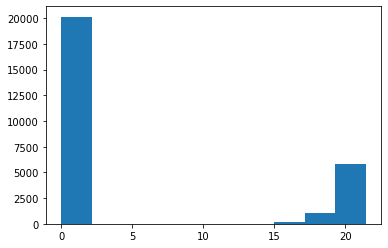

In [17]:
plt.hist(t[is_bgs & s & ~ is_QSO]['GAIA_PHOT_G_MEAN_MAG'])

In [18]:
high_parallax = t['PARALLAX'] > 0.1

In [19]:
t[is_bgs & s & ~ is_QSO & ~ high_parallax]

TARGETID,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,ZCAT_NSPEC,ZCAT_PRIMARY
int64,int32,int32,float64,float64,int64,float64,float64[10],int64,str6,str20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bool
39633192432439275,10001,10001,-0.0006036711122464021,2.736587855807194e-05,0,7586.65015289766,559.9643500743266 .. 0.0,7820,STAR,K,5,79.2051518836879,0,254.15725542988218,46.57628563076814,-8.012097,-26.60465,2015.5,1152921504606846976,1,TGT,0.6509150280060437,516,9011,2540p465,571089,4075,SER,0.02353454,8.138866,30.321959,65.23493,4.901994,-2.842413,48.66664,11.328323,10.3550205,1.7959667,0.7699995,1.7241226,6.4233484,13.819249,1.7810382,6.820829,14.953445,0,6.0,3.7204664,0.13539656,0.44174302,1407565305224426624,G2,20.4266,20.53717,18.883509,-0.42099646,N,2100,2,1152921504606846976,514,0,0,254.15725542988218,46.57628563076814,1,442.5022,1,1,-0.001,0.001,0.001,0.001,254.15724970562016,0.0,46.57628164378396,0.0,0.75084627,46.360023,0.017974747,8.648174,10.145876,105.8556,73.9581,0.48257163,0.21615991,2992.353,6.965532,527.2552,0.008967192,589.6214,3821.176,2.0929644,9.807797,6.4538067e-06,19.0344,1.1697821e-06,0.0,1061.7765,9.18355e-06,4.496819,10.142403,3038.7131,26.017908,535.9034,10.154843,1757.2534,3895.134,7.0723553,20.166359,1,True
39633192432440132,10001,10001,5.0616854166023114e-05,2.932639559081216e-06,0,18635.92760652107,-5008.956419259227 .. 0.0,7853,STAR,M,5,23579.10492533642,0,254.22461371970707,46.62270185456701,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.1433281069785407,516,9011,2540p465,571089,4932,EXP,0.02481886,2.6882198,13.36266,61.471287,76.54661,34.117912,271.60275,42.56624,25.171286,1.7063733,0.8924807,2.089693,10.387491,47.784832,12.704966,53.199715,188.50674,0,1.0,0.01,-0.6504006,0.41283944,0,,0.0,0.0,0.0,0.0,N,2000,2,1152921504606846976,257,0,0,254.22461371970707,46.62270185456701,1,442.5022,1,1,-0.01,0.01,0.0,0.0,254.22455503704325,0.0,46.62270198060979,0.0,0.79168063,43.19209,0.01669119,8.102669,9.320249,98.648445,69.177956,0.44544184,0.20179588,2818.4612,6.5672708,500.16214,0.00828412,556.6586,3

In [20]:
for row in t[is_bgs & s & ~ is_QSO& ~ high_parallax][0:50]:
    print(row['TARGET_RA'], row['TARGET_DEC'])

254.15725542988218 46.57628563076814
254.22461371970707 46.62270185456701
253.8508157284284 46.42569942613808
253.6992010358633 46.43443669812797
253.94571266883435 46.78246304032911
253.86725592924708 46.8644347799026
253.6091101869396 46.88988647622316
253.6209117998653 46.93409341973719
253.16365289749453 46.66992977988016
254.06888246762082 47.05788507013792
253.2082591760282 46.39512850782457
253.45487781529104 46.73534630429795
253.1735195740479 46.8730227665244
253.41074575646627 46.976374105009384
253.82531742300196 47.16161767225972
253.70981453043376 47.17046820237319
252.86250907632817 46.93390196514836
253.6368744135394 47.3108233032472
253.7477458836277 47.28503513769191
254.0536742237793 47.587679339122126
253.8565873515648 47.49751399888621
254.5758455987941 47.15349828999084
254.59607058965412 47.151297461277416
254.3189209481938 47.068145512829894
255.52390666813162 48.062000188788105
255.96848969813115 47.93219755506809
254.17458669355167 47.56213066238015
254.5342821

In [21]:
tg_id = t[is_bgs & s & ~ is_QSO& ~ high_parallax]['DESI_TARGET']
tg_ra = t[is_bgs & s & ~ is_QSO& ~ high_parallax]['TARGET_RA']
tg_dec = t[is_bgs & s & ~ is_QSO& ~ high_parallax]['TARGET_DEC']

In [23]:
print(t.colnames)

['TARGETID', 'HEALPIX', 'SPGRPVAL', 'Z', 'ZERR', 'ZWARN', 'CHI2', 'COEFF', 'NPIXELS', 'SPECTYPE', 'SUBTYPE', 'NCOEFF', 'DELTACHI2', 'COADD_FIBERSTATUS', 'TARGET_RA', 'TARGET_DEC', 'PMRA', 'PMDEC', 'REF_EPOCH', 'FA_TARGET', 'FA_TYPE', 'OBJTYPE', 'SUBPRIORITY', 'OBSCONDITIONS', 'RELEASE', 'BRICKNAME', 'BRICKID', 'BRICK_OBJID', 'MORPHTYPE', 'EBV', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'FLUX_W1', 'FLUX_W2', 'FLUX_IVAR_G', 'FLUX_IVAR_R', 'FLUX_IVAR_Z', 'FLUX_IVAR_W1', 'FLUX_IVAR_W2', 'FIBERFLUX_G', 'FIBERFLUX_R', 'FIBERFLUX_Z', 'FIBERTOTFLUX_G', 'FIBERTOTFLUX_R', 'FIBERTOTFLUX_Z', 'MASKBITS', 'SERSIC', 'SHAPE_R', 'SHAPE_E1', 'SHAPE_E2', 'REF_ID', 'REF_CAT', 'GAIA_PHOT_G_MEAN_MAG', 'GAIA_PHOT_BP_MEAN_MAG', 'GAIA_PHOT_RP_MEAN_MAG', 'PARALLAX', 'PHOTSYS', 'PRIORITY_INIT', 'NUMOBS_INIT', 'DESI_TARGET', 'BGS_TARGET', 'MWS_TARGET', 'SCND_TARGET', 'PLATE_RA', 'PLATE_DEC', 'COADD_NUMEXP', 'COADD_EXPTIME', 'COADD_NUMNIGHT', 'COADD_NUMTILE', 'MEAN_DELTA_X', 'RMS_DELTA_X', 'MEAN_DELTA_Y', 'RMS_DELTA_Y', 'MEAN

In [24]:
data2 = fits.getdata('/lfs/data/apcooper/static/desi/guadalupe/targetphot/targetphot-guadalupe.fits')

In [25]:
t2 = Table(data2)

In [26]:
print(t2.colnames)

['RELEASE', 'BRICKID', 'BRICKNAME', 'BRICK_OBJID', 'MORPHTYPE', 'RA', 'RA_IVAR', 'DEC', 'DEC_IVAR', 'DCHISQ', 'EBV', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'FLUX_IVAR_G', 'FLUX_IVAR_R', 'FLUX_IVAR_Z', 'MW_TRANSMISSION_G', 'MW_TRANSMISSION_R', 'MW_TRANSMISSION_Z', 'FRACFLUX_G', 'FRACFLUX_R', 'FRACFLUX_Z', 'FRACMASKED_G', 'FRACMASKED_R', 'FRACMASKED_Z', 'FRACIN_G', 'FRACIN_R', 'FRACIN_Z', 'NOBS_G', 'NOBS_R', 'NOBS_Z', 'PSFDEPTH_G', 'PSFDEPTH_R', 'PSFDEPTH_Z', 'GALDEPTH_G', 'GALDEPTH_R', 'GALDEPTH_Z', 'FLUX_W1', 'FLUX_W2', 'FLUX_W3', 'FLUX_W4', 'FLUX_IVAR_W1', 'FLUX_IVAR_W2', 'FLUX_IVAR_W3', 'FLUX_IVAR_W4', 'MW_TRANSMISSION_W1', 'MW_TRANSMISSION_W2', 'MW_TRANSMISSION_W3', 'MW_TRANSMISSION_W4', 'ALLMASK_G', 'ALLMASK_R', 'ALLMASK_Z', 'FIBERFLUX_G', 'FIBERFLUX_R', 'FIBERFLUX_Z', 'FIBERTOTFLUX_G', 'FIBERTOTFLUX_R', 'FIBERTOTFLUX_Z', 'REF_EPOCH', 'WISEMASK_W1', 'WISEMASK_W2', 'MASKBITS', 'LC_FLUX_W1', 'LC_FLUX_W2', 'LC_FLUX_IVAR_W1', 'LC_FLUX_IVAR_W2', 'LC_NOBS_W1', 'LC_NOBS_W2', 'LC_MJD_W1', 'LC_MJD_W

In [27]:
import sys
apcpy_path = '/data/apcooper/sfw/apcpy3/py'
if not (apcpy_path in sys.path):
    sys.path.append(apcpy_path)

In [28]:
from apcpy3.apc_lists import match

/data/apcooper/sfw/apcpy3/py/apcpy3/apc_lists.py:34: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif method is 'pandas':


In [29]:
matches = match(t[is_bgs & s & ~ is_QSO& ~ high_parallax]['TARGETID'],t2['TARGETID'])
is_matched = matches >= 0
t2_x = t2['FRACFLUX_R'][matches[is_matched]]

In [31]:
is_contaminated  = t2_x > 0.1

In [32]:
t_01 = t2_x[~is_contaminated]

(array([8518., 1442.,  667.,  404.,  271.,  222.,  202.,  223.,  211.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
 <BarContainer object of 9 artists>)

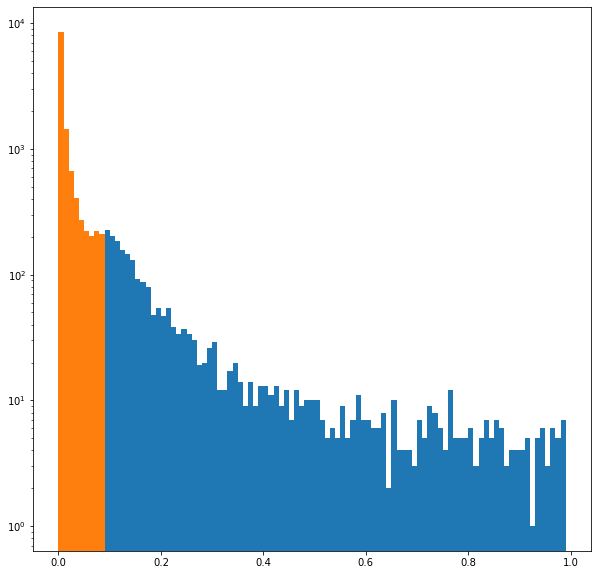

In [33]:
plt.figure(figsize=(10,10))
plt.yscale('log')
plt.hist(t2_x, bins=np.arange(0,1,0.01))
plt.hist(t_01,bins=np.arange(0,0.1,0.01))
#plt.savefig('FracfluxR_cut01.pdf')

In [65]:
for row in t2[matches[is_matched]][~ is_contaminated][0:50]:
    print(row['RA'], row['DEC'])

253.6992010358633 46.43443669812797
253.6091101869396 46.88988647622316
253.6209117998653 46.93409341973719
253.16365289749453 46.66992977988016
253.2082591760282 46.39512850782457
253.41074575646627 46.976374105009384
253.70981453043376 47.17046820237319
254.0536742237793 47.587679339122126
253.8565873515648 47.49751399888621
254.5758455987941 47.15349828999084
254.59607058965412 47.151297461277416
254.3189209481938 47.068145512829894
255.52390666813162 48.062000188788105
255.96848969813115 47.93219755506809
254.53428213984165 47.560905733070406
255.95946492187613 48.49969121339859
252.84859922672422 47.822785604917605
254.11978724971476 49.68334844975278
254.3748604521736 49.734477368307786
254.01416559132105 49.937572965416294
253.84428252321246 49.96642464939069
255.74960635624754 50.468566833413576
255.35995049653567 50.45457985072848
255.40311818110862 50.44415701580533
255.26459865957364 50.57240985844923
255.5450315928257 50.81250990763127
253.78319334498605 49.965532220157954


In [61]:
desi_taget = t2['DESI_TARGET'][matches[is_matched]][~ is_contaminated]
ra_target  = t2['RA'][matches[is_matched]][~ is_contaminated]
dec_target = t2['DEC'][matches[is_matched]][~ is_contaminated]

In [57]:
t2[matches[is_matched]][~ is_contaminated][0:3]

RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,RA,RA_IVAR,DEC,DEC_IVAR,DCHISQ,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,REF_EPOCH,WISEMASK_W1,WISEMASK_W2,MASKBITS,LC_FLUX_W1,LC_FLUX_W2,LC_FLUX_IVAR_W1,LC_FLUX_IVAR_W2,LC_NOBS_W1,LC_NOBS_W2,LC_MJD_W1,LC_MJD_W2,SHAPE_R,SHAPE_E1,SHAPE_E2,SHAPE_R_IVAR,SHAPE_E1_IVAR,SHAPE_E2_IVAR,SERSIC,SERSIC_IVAR,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,PHOTSYS,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL,CMX_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV2_DESI_TARGET,SV2_BGS_TARGET,SV2_MWS_TARGET,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SCND_TARGET,SV1_SCND_TARGET,SV2_SCND_TARGET,SV3_SCND_TARGET,SURVEY,PROGRAM,TILEID
int16,int32,str8,int32,str4,float64,float32,float64,float32,float32[5],float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,float32[15],float32[15],float32[15],float32[15],int16[15],int16[15],float64[15],float64[15],float32,float32,float32,float32,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32,float32,float32,float32,float32,float32,str1,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str7,str6,int32
9011,571088,2537p465,2611,SER,253.6992010358633,1865675800000.0,46.43443669812797,1901689700000.0,90317.234 .. 111794.24,0.020844111,9.627164,32.673798,67.1949,122.63484,23.905144,16.292624,0.94016224,0.959288,0.97701925,0.004338969,0.0025464261,0.0013579169,0.036667436,0.036530163,0.031673964,0.9901476,0.9913332,0.82925177,3,3,2,737.69366,244.4914,106.26527,515.4371,144.87982,49.607227,73.18217,53.268955,-7.972411,380.12445,2.5303366,1.0227374,0.0017741445,2.4098954e-05,0.9964738,0.99783295,0.9995374,0.9998253,0,0,0,3.1216345,10.59457,21.788134,3.1216345,10.59457,21.788134,2015.5,0,0,0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,1.5090431,-0.030164065,0.2126944,10704.868,20608.627,37593.074,6.0,196.06464,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.31459,False,8.50899,True,0.0,0.0,0.0,0.0,0.0,0.0,N,39633192428243507,0.9088246041534247,516,2100,2,10001,0,1152921504606846976,514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,main,bright,20757
9011,573066,2535p470,2683,SER,253.6091101869396,2083355900000.0,46.88988647622316,1143742400000.0,109035.05 .. 181034.97,0.028587887,10.52333,33.647087,77.48912,170.64236,33.502804,20.351906,0.9188559,0.944589,0.96861684,0.07293505,0.039391484,0.049115807,0.0014125669,0.0011755001,0.0013807204,0.99996895,0.9999744,0.9999852,3,3,3,813.9987,263.3785,127.328705,574.41016,160.29543,67.80026,92.63024,80.835625,206.30327,4764.7134,2.9829679,1.2549624,0.002124492,2.6323636e-05,0.9951669,0.99702907,0.9993656